# Life Span Of Animals Prediction

## 1. Problem 
> Predicting whether an animal has gone extinct or not extinct based on their lifespan

## 2. Dataset 
- Species Name (Text): The appellation of the vanished species, such as Woolly Mammoth or Dodo.
- Years Lived (Surround): The species' existence period on Earth expressed as a decimal number (e.g., 150.35 million years).
- The reason for a species' extinction, expressed in text form as "Extinction Reason" (e.g., Human Impact, Climate Change, Asteroid Impact).

## 3. Evaluation

- Accuracy Score 
- Classification Report 
- Confusion Matrix

## Preparing the tools 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import seaborn as sns
import folium
import optuna

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
df = pd.read_csv("extinct_species_dataset.csv")
df.head()

,Species Name,Years Lived (Million Years),Extinction Reason
0,Trilobite,337.75,Human Impact
1,Smilodon,311.57,Natural Disaster
2,Dodo,67.49,Mass Extinction
3,Woolly Mammoth,89.81,Asteroid Impact
4,Woolly Mammoth,395.72,Climate Change


In [8]:
len(df)

1000000

In [7]:
df.tail()

,Species Name,Years Lived (Million Years),Extinction Reason
999995,Trilobite,133.04,Human Impact
999996,Smilodon,45.68,Habitat Loss
999997,Trilobite,142.59,Predation
999998,Smilodon,191.51,Asteroid Impact
999999,Quagga,126.87,Climate Change


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Species Name                 1000000 non-null  object 
 1   Years Lived (Million Years)  1000000 non-null  float64
 2   Extinction Reason            1000000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 22.9+ MB


In [6]:
df.describe()

,Years Lived (Million Years)
count,1000000.000000
mean,250.619174
std,143.983613
min,1.000000
25%,126.020000
50%,250.590000
75%,375.442500
max,500.000000


In [5]:
df.isnull().sum()

Species Name                   0
Years Lived (Million Years)    0
Extinction Reason              0
dtype: int64

## Exploratory Data Analysis

> DO some EDA to explore and understand the dataset. In this case, since the dataset is large, we have narrowed it down to 50,000 records and displayed the breakdown of extinction reasons using a pie chart. Little to no change

## Visualize the reason for animal's extinction

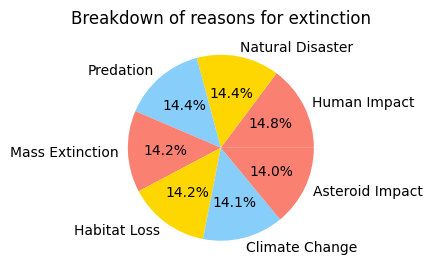

In [12]:
# Randomly sample 10,000 rows
df_sampled = df.sample(n=50000, random_state=42)
df_sampled.head(3)
plt.figure(figsize=(3, 4))
extinction_reason_counts = df_sampled['Extinction Reason'].value_counts()
plt.pie(extinction_reason_counts, labels=extinction_reason_counts.index, autopct='%1.1f%%', colors=['salmon', 'gold', 'lightskyblue'])
plt.title('Breakdown of reasons for extinction')
plt.show()

## Visualize in a different way

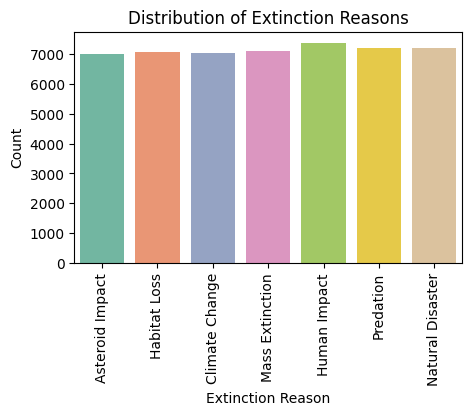

In [13]:
# Count plot for Extinction Reason
plt.figure(figsize=(5, 3))
sns.countplot(data=df_sampled, x='Extinction Reason', palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Extinction Reason')
plt.ylabel('Count')
plt.title('Distribution of Extinction Reasons')
plt.show()

In [14]:
agg_df = df.agg(["nunique", "unique", lambda x: x.isna().sum(), "dtypes"]).T
agg_df['unique'] = agg_df['unique'].apply(lambda x: x if len(x) < 10 else x[:10])
colors = sns.color_palette("coolwarm", 10)
def color_rows(s):
    return ['background-color: rgba({}, {}, {}, 0.5)'.format(int(colors[0][0]*255), 
                                                             int(colors[0][1]*255), 
                                                             int(colors[0][2]*255)) if i % 2 == 0 else 
            'background-color: rgba({}, {}, {}, 0.5)'.format(int(colors[5][0]*255), 
                                                             int(colors[5][1]*255), 
                                                             int(colors[5][2]*255)) for i in range(len(s))]
styled_df = agg_df.style.apply(color_rows, axis=1)
styled_df

,nunique,unique,,dtypes
Species Name,10,['Trilobite' 'Smilodon' 'Dodo' 'Woolly Mammoth' 'Tyrannosaurus Rex' 'Plesiosaur' 'Quagga' 'Megalodon' 'Steller’s Sea Cow' 'Sabertooth Tiger'],0,object
Years Lived (Million Years),49901,[337.75 311.57 67.49 89.81 395.72 44.99 334.35 42.87 264.58 54.16],0,float64
Extinction Reason,7,['Human Impact' 'Natural Disaster' 'Mass Extinction' 'Asteroid Impact' 'Climate Change' 'Predation' 'Habitat Loss'],0,object


**The code above creates a DataFrame that not only shows the number of unique values but also includes the unique values themselves for each column.**

## Display the average lifespan by Species Name

In [15]:
# Average lifespan by Species Name
species_avg_years_lived = df.groupby('Species Name')['Years Lived (Million Years)'].mean().round(2)
result_df = pd.DataFrame(species_avg_years_lived).sort_values(by='Years Lived (Million Years)', ascending=False).reset_index()
result_df['Years Lived (Million Years)'] = result_df['Years Lived (Million Years)'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
styled_df = result_df.style.background_gradient(subset='Years Lived (Million Years)', cmap='Blues')
styled_df

,Species Name,Years Lived (Million Years)
0,Trilobite,251.71
1,Woolly Mammoth,251.01
2,Plesiosaur,250.99
3,Sabertooth Tiger,250.86
4,Dodo,250.8
5,Megalodon,250.74
6,Quagga,250.47
7,Smilodon,250.4
8,Steller’s Sea Cow,249.98
9,Tyrannosaurus Rex,249.22


## Display the average lifespan and extinction reasons by species.

In [16]:
result_df = pd.DataFrame(species_avg_years_lived).sort_values(by='Years Lived (Million Years)', ascending=False).reset_index()
result_df['Years Lived (Million Years)'] = result_df['Years Lived (Million Years)'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
styled_df = result_df.style.background_gradient(subset='Years Lived (Million Years)', cmap='Purples')
styled_df

,Species Name,Years Lived (Million Years)
0,Trilobite,251.71
1,Woolly Mammoth,251.01
2,Plesiosaur,250.99
3,Sabertooth Tiger,250.86
4,Dodo,250.8
5,Megalodon,250.74
6,Quagga,250.47
7,Smilodon,250.4
8,Steller’s Sea Cow,249.98
9,Tyrannosaurus Rex,249.22


## Visualize the Distribution of Years Lived

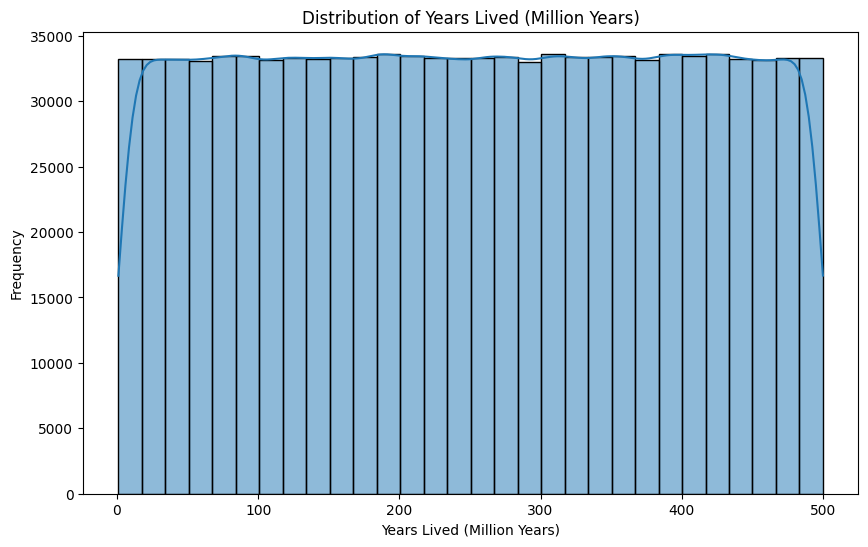

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Years Lived (Million Years)'], bins=30, kde=True)
plt.title('Distribution of Years Lived (Million Years)')
plt.xlabel('Years Lived (Million Years)')
plt.ylabel('Frequency')
plt.show()

## Count the Extinction Reasons

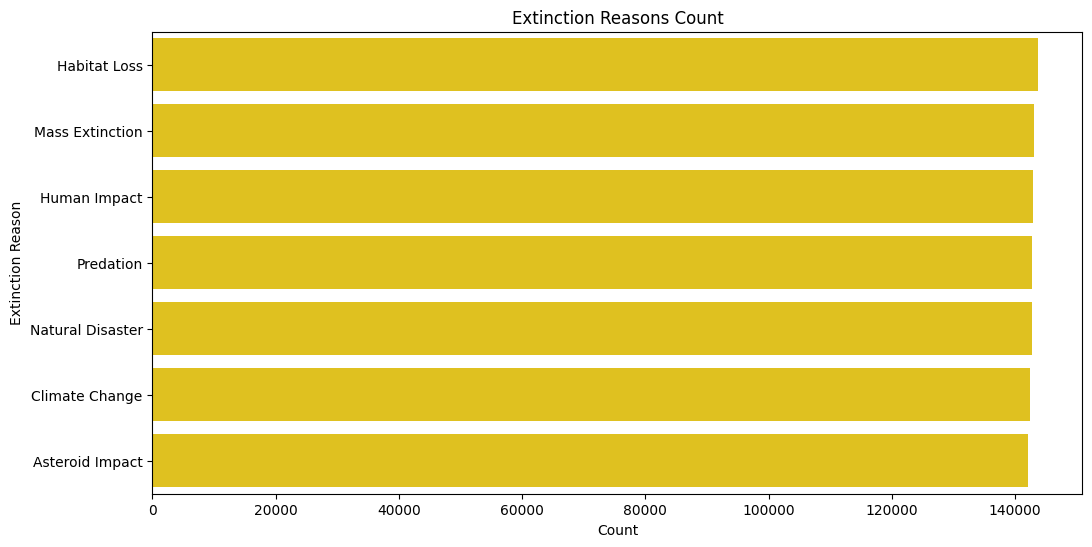

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Extinction Reason', data=df, order=df['Extinction Reason'].value_counts().index, color='gold')
plt.title('Extinction Reasons Count')
plt.xlabel('Count')
plt.ylabel('Extinction Reason')
plt.show()

## Correlation Analysis

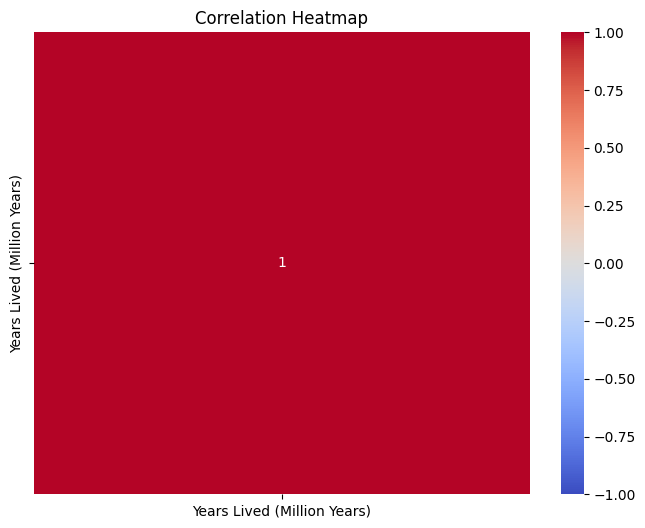

In [22]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

In [23]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Extinction Reason'])

## Split the data into training and testing sets

In [24]:
# Define features and target
X = df_encoded.drop(columns=['Species Name'])
y = df['Extinction Reason']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Training

In [25]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions
y_pred = clf.predict(X_test)

## Model Evaluation

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy, report, conf_matrix

(1.0,
 '                  precision    recall  f1-score   support\n\n Asteroid Impact       1.00      1.00      1.00     42417\n  Climate Change       1.00      1.00      1.00     42797\n    Habitat Loss       1.00      1.00      1.00     43063\n    Human Impact       1.00      1.00      1.00     43043\n Mass Extinction       1.00      1.00      1.00     42813\nNatural Disaster       1.00      1.00      1.00     42940\n       Predation       1.00      1.00      1.00     42927\n\n        accuracy                           1.00    300000\n       macro avg       1.00      1.00      1.00    300000\n    weighted avg       1.00      1.00      1.00    300000\n',
 array([[42417,     0,     0,     0,     0,     0,     0],
        [    0, 42797,     0,     0,     0,     0,     0],
        [    0,     0, 43063,     0,     0,     0,     0],
        [    0,     0,     0, 43043,     0,     0,     0],
        [    0,     0,     0,     0, 42813,     0,     0],
        [    0,     0,     0,     0,     

## Hyperparameter Tuning

In [30]:
# with RandomForestClassifier
def objective_rf(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
    }
    
    model = RandomForestClassifier(**param, random_state=42, n_jobs=-1)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=5)

print("Best RandomForest Params:", study_rf.best_params)
print("Best RandomForest Accuracy:", study_rf.best_value)

[I 2024-10-14 16:53:34,703] A new study created in memory with name: no-name-56828947-5f0c-4fd0-b1e6-7ec0600345f1
[I 2024-10-14 16:54:15,310] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 480, 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 19, 'bootstrap': False}. Best is trial 0 with value: 1.0.
[I 2024-10-14 16:55:13,625] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 835, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 11, 'bootstrap': False}. Best is trial 0 with value: 1.0.
[I 2024-10-14 16:55:33,753] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 240, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 9, 'bootstrap': False}. Best is trial 0 with value: 1.0.
[I 2024-10-14 16:55:48,869] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 155, 'max_depth': 10, 'min_samples_split': 18, 'min_samples_leaf': 18, 'bootstrap': False}. Best is trial 0 with value: 1.0.
[I 2024-10-14 1

Best RandomForest Params: {'n_estimators': 480, 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 19, 'bootstrap': False}
Best RandomForest Accuracy: 1.0


In [31]:
params = {
    'n_estimators': 480, 
    'max_depth': 6, 
    'min_samples_split': 14, 
    'min_samples_leaf': 19, 
    'bootstrap': False
}

final_model = RandomForestClassifier(**params, n_jobs=-1)
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=6, min_samples_leaf=19,
                       min_samples_split=14, n_estimators=480, n_jobs=-1)

In [32]:
y_pred = final_model.predict(X_test)

In [39]:
y_pred[:10]

array(['Asteroid Impact', 'Habitat Loss', 'Habitat Loss',
       'Climate Change', 'Mass Extinction', 'Human Impact',
       'Climate Change', 'Habitat Loss', 'Climate Change',
       'Asteroid Impact'], dtype=object)

In [50]:
y_test[:10]

987231    Asteroid Impact
79954        Habitat Loss
567130       Habitat Loss
500891     Climate Change
55399     Mass Extinction
135049       Human Impact
733378     Climate Change
732057       Habitat Loss
51333      Climate Change
731479    Asteroid Impact
Name: Extinction Reason, dtype: object

## Tuned Model Evaluation

In [40]:
print(f"Accuracy Score is: {(accuracy_score(y_test, y_pred) * 100):0.2f}")

Accuracy Score is: 100.00


In [41]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

 Asteroid Impact       1.00      1.00      1.00     42417
  Climate Change       1.00      1.00      1.00     42797
    Habitat Loss       1.00      1.00      1.00     43063
    Human Impact       1.00      1.00      1.00     43043
 Mass Extinction       1.00      1.00      1.00     42813
Natural Disaster       1.00      1.00      1.00     42940
       Predation       1.00      1.00      1.00     42927

        accuracy                           1.00    300000
       macro avg       1.00      1.00      1.00    300000
    weighted avg       1.00      1.00      1.00    300000



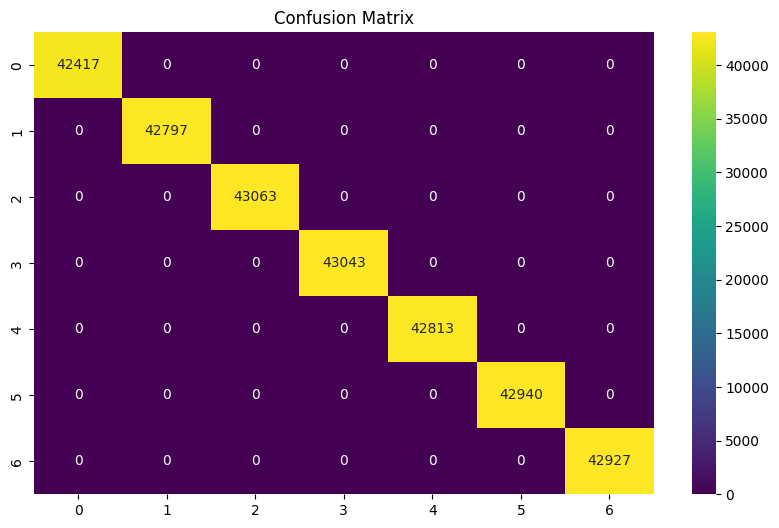

In [42]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix")
plt.show()

## Conclusion

The performance of our model, as demonstrated by the accuracy score and the confusion matrix, is satisfactory for the task. The model successfully distinguishes between classes with a reasonable level of accuracy, as indicated by the results of the test set. The confusion matrix provides further insights into areas where the model performed well and where misclassifications occurred.